<a href="https://colab.research.google.com/github/vsolodkyi/NeuralNetworks_SkillBox/blob/main/module_19/1_Saved_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка моделей TensorFlow

После того, как мы обучили и экспортировали TensorFlow-модель как `saved model`, мы можем загружать и использовать её для инференса.

Давайте загрузим модель, обученную на MNIST, в Colab и попробуем применить её для распознавания цифр.

Этим ноутбуком мы по сути имитируем простое клиентское приложение, которое использует обученную нейронную сеть для какой-то своей бизнес-логики (распознавание цифр).

### Используем TensorFlow 2.0

На момент подготовки этих материалов в Google Colab по умолчанию используется версия TensorFlow 1.x.

Переключаемся на версию 2.0 (работает только в Colab).

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


### Загрузка библиотек

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

### Подготовка директории с моделью

Загрузим в Colab (через Upload) архив с нашей моделью `saved_model.zip` и разархивируем (сделать нужно лишь один раз).

В результате получим директорию `saved_model`, в которой будет находиться наша модель (в поддиректории `1`, соответствующей версии модели).

In [ ]:
if 1:
    !unzip /content/saved_model.zip -d ./

Archive:  /content/saved_model.zip
   creating: ./saved_model/
   creating: ./saved_model/1/
   creating: ./saved_model/1/assets/
  inflating: ./saved_model/1/saved_model.pb  
   creating: ./saved_model/1/variables/
  inflating: ./saved_model/1/variables/variables.data-00001-of-00002  
  inflating: ./saved_model/1/variables/variables.index  
  inflating: ./saved_model/1/variables/variables.data-00000-of-00002  


### Загрузка модели

Теперь мы можем загрузить модель. При таком вызове в `model` будет содержаться и нужный нам вычислительный граф, и веса обученной модели.

In [ ]:
model = tf.keras.models.load_model('saved_model/1')

### Загрузка датасета MNIST

Далее протестируем модель в режиме инференса на некоторых случайных цифрах. Для этого загрузим датасет MNIST и будем использовать тестовую выборку оттуда.

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.

11493376/11490434 [==============================] - 0s 0us/step


### Функция для предсказания цифры

Создадим обёртку для инференса — функцию, которая запустит прямое распространение для нашей модели и визуализирует результат предсказания.

Будем визуализировать входную цифру и график распределения вероятностей по классам.

In [ ]:
def predict_digit(sample):
    
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    # Визуализация входного изображения
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])

    # Визуализация распределения вероятностей по классам
    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted number: {}'.format(ans))

### Пример запуска инференса

Возьмём случайную цифру из тестового датасета MNIST и вызовем `predict_digit` для неё. Посмотрим на предсказание и на правильный ответ.

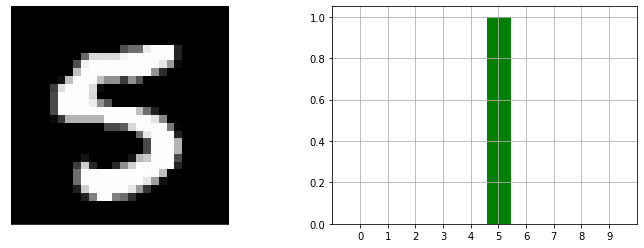

Predicted number: 5
True Answer: 5


In [ ]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
predict_digit(sample)

print('True Answer: {}'.format(test_y[idx]))

После того, как мы научились сохранять и загружать обученные модели, мы можем помещать инференс в произвольные программы на Python.

**[Задание 1]** Реализуйте самостоятельное клиентское приложение: реализуйте скрипт на Python (`predict.py`), который принимает путь к изображению с цифрой в виде аргумента командной строки (`python3 predict.py path/to/digit.png`) и производит распознавание соответствующей цифры. Внутри скрипта `predict.py` вам необходимо загрузить TensorFlow-модель, открыть изображение `digit.png`, подготовить вход в нейронную сеть, запустить инференс и распечатать результат предсказания. Файл `digit.png` создайте самостоятельно в графическом редакторе (например, Paint). Запустите скрипт `predict.py` на собственной машине. Предварительно вам может понадобиться установить TensorFlow (`pip3 install tensorflow` или `pip3 install tensorflow-gpu`, если у вас есть GPU).

Подробнее про установку TensorFlow: https://www.tensorflow.org/install